<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем данные.

In [3]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,146884,87941.0,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,...,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0.99,0
1,95597,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
2,96768,65927.0,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,...,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,156.00,0
3,75511,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
4,255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1


In [4]:
new_df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,134942.204059,90246.027057,-1.343917,1.073424,-2.210975,1.577305,-0.718828,-0.534841,-1.416401,0.172487,...,0.442979,-0.118322,-0.029826,-0.077411,0.066698,0.025111,0.138874,0.071175,108.751556,0.447576
std,82884.629330,47908.902351,4.313886,3.051046,4.532798,2.489639,3.227972,1.660290,3.535573,4.153870,...,2.426750,1.053107,0.986021,0.555493,0.614876,0.476334,0.642115,0.365595,263.791471,0.497525
min,541.000000,406.000000,-30.552380,-25.831782,-31.103685,-3.228317,-22.105532,-6.406267,-20.371514,-37.353443,...,-6.389132,-8.887017,-15.981649,-2.221543,-3.536716,-1.193749,-3.908080,-2.765070,0.000000,0.000000
25%,65531.000000,51629.000000,-2.005021,-0.252242,-3.748798,-0.296653,-1.237786,-1.260137,-1.987895,-0.201888,...,-0.170935,-0.600947,-0.229791,-0.406013,-0.288296,-0.289746,-0.055204,-0.046667,1.290000,0.000000
50%,131272.000000,79540.000000,-0.481531,0.633287,-1.029986,0.858693,-0.304328,-0.576888,-0.465399,0.103700,...,0.113960,-0.058028,-0.040176,-0.021985,0.106457,-0.028738,0.033512,0.034663,17.100000,0.000000
75%,209256.500000,137477.500000,1.151931,1.965120,0.459922,3.304814,0.608610,0.072575,0.311050,0.695368,...,0.547443,0.464634,0.176405,0.294660,0.400711,0.314804,0.404303,0.212968,99.990000,1.000000
max,283656.000000,171766.000000,2.319584,16.713389,2.849420,8.431986,11.095089,13.085694,17.256623,20.007208,...,27.202839,2.941475,5.303607,1.249015,2.208209,2.745261,6.267709,2.440756,3502.110000,1.000000


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_full.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [6]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,1.176758e-15,3.384475e-16,-1.399495e-15,2.094652e-15,1.006511e-15,1.495446e-15,-5.633807e-16,1.141630e-16,...,1.616146e-16,-3.510464e-16,2.630603e-16,4.473016e-15,5.146818e-16,1.685202e-15,-3.655912e-16,-1.227702e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [8]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "Logistic Regression": LogisticRegression(),  # Логистическая регрессия
    "SVC": SVC(),  # Метод опорных векторов
    "KNeighborsClassifier": KNeighborsClassifier(),  # Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier(),  # Дерево решений
    "RandomForestClassifier": RandomForestClassifier(),  # Случайный лес
    "GradientBoostingClassifier": GradientBoostingClassifier()  # Градиентный бустинг
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [11]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():

    training_score = cross_val_score(classifier, X_train, y_train, cv=3)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 93.0 % accuracy score
Модель  SVC получила на обучающей выборке 54.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 55.00000000000001 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 90.0 % accuracy score
Модель  RandomForestClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  GradientBoostingClassifier получила на обучающей выборке 94.0 % accuracy score


Наилучшую точность (94.0%) показали RandomForestClassifier и GradientBoostingClassifier. Они могут быть кандидатами для более детального анализа и дальнейшей настройки.
SVC показал очень низкую точность (54.0%), что указывает на необходимость изменения параметров или выбора другой модели для данной задачи.

Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], "solver": ["liblinear"]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=3, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_  # Логистическая регрессия

print("Лучшие параметры логистической регрессии:", grid_log_reg.best_params_)


Лучшие параметры логистической регрессии: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Уменьшенная сетка параметров
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": [0.1, 1]
}

# Используем только часть данных для тестирования
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]

# Проверяем форму данных
print("Размеры X_train_small:", np.shape(X_train_small))
print("Размеры y_train_small:", np.shape(y_train_small))

# GridSearchCV с уменьшенным количеством фолдов и многопоточностью
grid_svc = GridSearchCV(SVC(), svc_params, cv=2, scoring='accuracy', n_jobs=-1)

try:
    # Измерение времени выполнения
    import time
    start_time = time.time()
    grid_svc.fit(X_train_small, y_train_small)
    end_time = time.time()

    # Лучшая модель
    svc = grid_svc.best_estimator_

    # Вывод результатов
    print("Лучшие параметры SVM:", grid_svc.best_params_)
    print("Время выполнения (секунды):", end_time - start_time)

except Exception as e:
    print("Произошла ошибка:", str(e))


Размеры X_train_small: (709, 31)
Размеры y_train_small: (709,)
Лучшие параметры SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Время выполнения (секунды): 881.0684907436371


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Метод ближайших соседей (KNN)
knears_params = {"n_neighbors": list(range(2, 7)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=3, scoring='accuracy')
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_  # Метод ближайших соседей

print("Лучшие параметры KNN:", grid_knears.best_params_)


Лучшие параметры KNN: {'algorithm': 'auto', 'n_neighbors': 2}


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Дерево решений
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 10)), "min_samples_split": [2, 5, 10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3, scoring='accuracy')
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_  # Дерево решений

print("Лучшие параметры дерева решений:", grid_tree.best_params_)


Лучшие параметры дерева решений: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Случайный лес
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
random_forest = grid_rf.best_estimator_  # Случайный лес

print("Лучшие параметры случайного леса:", grid_rf.best_params_)


Лучшие параметры случайного леса: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Градиентный бустинг
gb_params = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3, scoring='accuracy')
grid_gb.fit(X_train, y_train)
gradient_boosting = grid_gb.best_estimator_  # Градиентный бустинг

print("Лучшие параметры градиентного бустинга:", grid_gb.best_params_)


Лучшие параметры градиентного бустинга: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [19]:
from sklearn.model_selection import cross_val_score

# Список моделей и их названий
models = {
    "Logistic Regression": log_reg,
    "KNeighbors Classifier": knears_neighbors,
    "Support Vector Classifier": svc,
    "Decision Tree Classifier": tree_clf,
    "Random Forest Classifier": random_forest,
    "Gradient Boosting Classifier": grid_gb
}

# Выводим кросс-валидационные оценки для каждой модели
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=3).mean() * 100
    print(f"{name} Cross Validation Score: {round(score, 2)}%")


Logistic Regression Cross Validation Score: 94.08%
KNeighbors Classifier Cross Validation Score: 58.96%
Support Vector Classifier Cross Validation Score: 88.01%
Decision Tree Classifier Cross Validation Score: 91.96%
Random Forest Classifier Cross Validation Score: 93.8%
Gradient Boosting Classifier Cross Validation Score: 93.38%


1. Значительное улучшение SVC и KNN:

Эти модели наиболее чувствительны к настройке гиперпараметров. Для SVC настройка ядра и регуляризации сильно повлияла на производительность. KNN выиграл от настройки числа соседей и алгоритма.

2. Незначительное улучшение остальных моделей:

Logistic Regression, Decision Tree, Random Forest и Gradient Boosting уже показывали хорошие результаты, поэтому их улучшение после настройки было менее заметным.

3. Сравнение моделей:

Gradient Boosting Classifier и Random Forest Classifier остаются лидерами с показателями выше 93%, что подтверждает их эффективность для ваших данных.
Logistic Regression и Decision Tree Classifier также демонстрируют высокую производительность (91-94%), что делает их хорошим выбором для задач с меньшей сложностью.

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [20]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Инициализация объектов
rob_scaler = RobustScaler()
log_reg = LogisticRegression()
skf = StratifiedKFold(n_splits=5)

# Разделение данных
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабирование данных
X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['scaled_amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1, 1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_test['scaled_time'] = rob_scaler.transform(X_test['Time'].values.reshape(-1, 1))

X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

# Списки для хранения метрик
metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "auc": []
}

# Кросс-валидация с использованием NearMiss
for train_idx, test_idx in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Создание пайплайна
    pipeline = imbalanced_make_pipeline(RobustScaler(), NearMiss(sampling_strategy='majority'), log_reg)
    pipeline.fit(X_train_fold, y_train_fold)

    # Предсказание
    y_pred = pipeline.predict(X_test_fold)

    # Сбор метрик
    metrics["accuracy"].append(pipeline.score(X_test_fold, y_test_fold))
    metrics["precision"].append(precision_score(y_test_fold, y_pred))
    metrics["recall"].append(recall_score(y_test_fold, y_pred))
    metrics["f1"].append(f1_score(y_test_fold, y_pred))
    metrics["auc"].append(roc_auc_score(y_test_fold, y_pred))

# Вывод средних значений метрик
print("Средние метрики после кросс-валидации:")
for metric, values in metrics.items():
    print(f"{metric.capitalize()}: {round(np.mean(values), 4)}")


Средние метрики после кросс-валидации:
Accuracy: 0.5055
Precision: 0.0033
Recall: 0.9492
F1: 0.0066
Auc: 0.727


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [ ]:
# Узнать количество строк и столбцов в обучающей выборке
print(f"Размеры обучающей выборки: {X_train.shape}")

# Узнать количество строк и столбцов в тестовой выборке
print(f"Размеры тестовой выборки: {X_test.shape}")


Размеры обучающей выборки: (227845, 31)
Размеры тестовой выборки: (56962, 31)


In [ ]:
# Распределение целевой переменной в обучающей выборке
print("Распределение классов в y_train:")
print(y_train.value_counts())

# Распределение целевой переменной в тестовой выборке
print("Распределение классов в y_test:")
print(y_test.value_counts())


Распределение классов в y_train:
Class
0    227451
1       394
Name: count, dtype: int64
Распределение классов в y_test:
Class
0    56864
1       98
Name: count, dtype: int64


In [ ]:
import torch

if torch.cuda.is_available():
    print(f"Доступен GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU недоступен. Используется CPU.")


Доступен GPU: Tesla T4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Уменьшение размера данных
sample_size = 10000  # Размер подвыборки
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, stratify=y_train, random_state=42)

print(f"Новый размер обучающей выборки: {X_train_sample.shape}")


Новый размер обучающей выборки: (10000, 31)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения кривой обучения
def plot_learning_curve(estimator, X, y, title, cv=2, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Количество обучающих данных")
    plt.ylabel(scoring.capitalize())

    # Вычисляем значения для кривой обучения
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    # Средние и стандартные отклонения метрик
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Графики с областями стандартных отклонений
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Графики средних значений
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Обучающая выборка")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Кросс-валидация")

    plt.legend(loc="best")
    plt.grid()
    plt.show()


Построение графика для Logistic Regression...


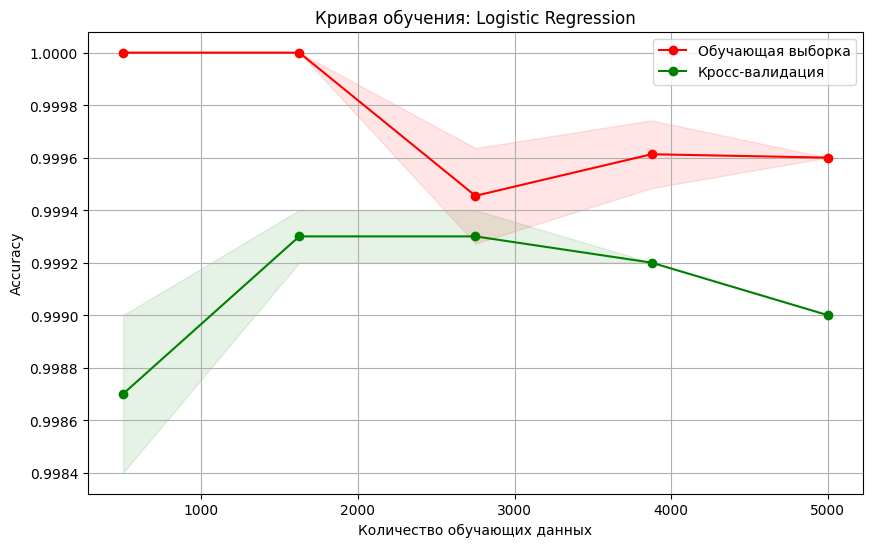

In [ ]:
# График для Logistic Regression
print("Построение графика для Logistic Regression...")
plot_learning_curve(models["Logistic Regression"], X_train_sample, y_train_sample, title="Кривая обучения: Logistic Regression")


График показывает, что логистическая регрессия на малых данных переобучается, достигая почти 100% точности на обучающей выборке, тогда как точность на валидационной выборке значительно ниже. По мере увеличения количества данных разрыв между кривыми сокращается, что говорит об улучшении обобщающей способности модели.

Построение графика для KNeighbors Classifier...


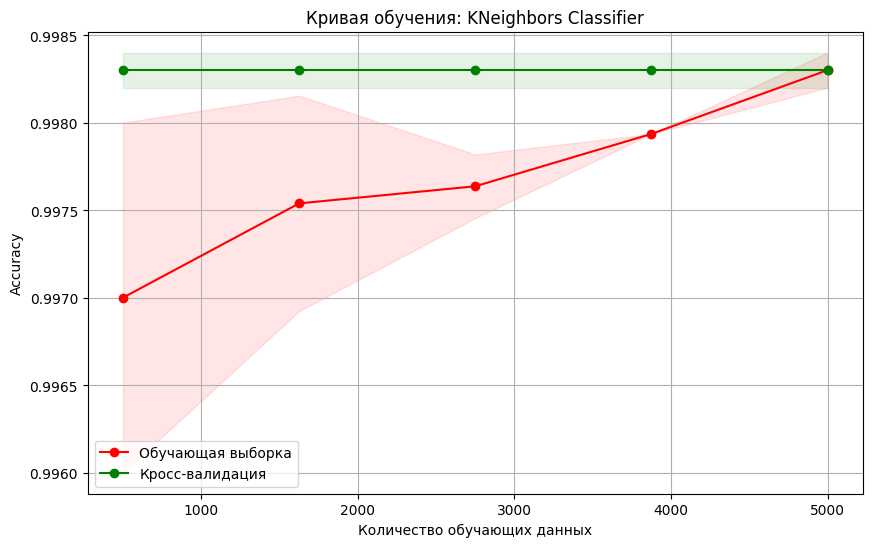

In [ ]:
# График для KNeighbors Classifier
print("Построение графика для KNeighbors Classifier...")
plot_learning_curve(models["KNeighbors Classifier"], X_train_sample, y_train_sample, title="Кривая обучения: KNeighbors Classifier")

Кривая обучения для KNeighbors Classifier показывает, что по мере увеличения объёма данных точность на обучающей выборке растёт и приближается к точности на валидационной выборке, что свидетельствует об улучшении обобщающей способности модели. При этом точность на валидационной выборке остаётся стабильной и высокой на всём протяжении, что говорит о хорошем качестве модели на тестовых данных.

Построение графика для Decision Tree Classifier...


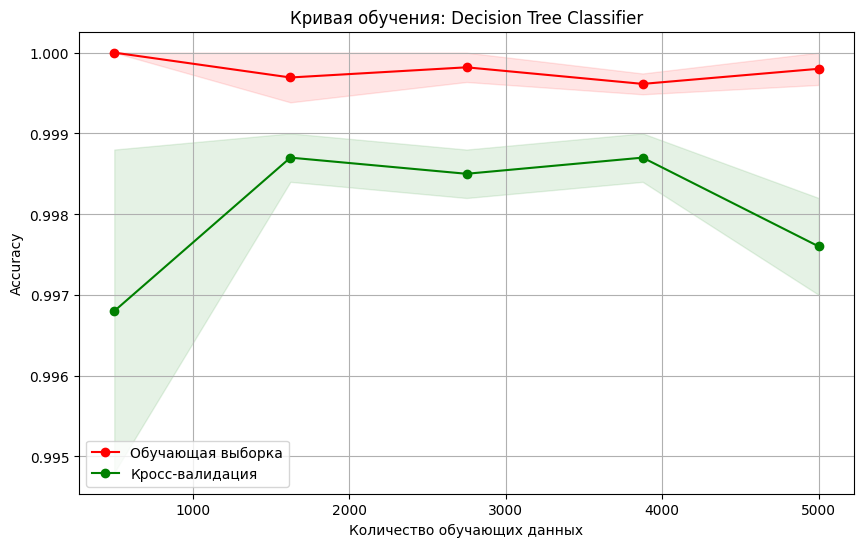

In [ ]:
# График для Decision Tree Classifier
print("Построение графика для Decision Tree Classifier...")
plot_learning_curve(models["Decision Tree Classifier"], X_train_sample, y_train_sample, title="Кривая обучения: Decision Tree Classifier")


Кривая обучения для Decision Tree Classifier показывает, что на обучающей выборке модель достигает почти идеальной точности (Accuracy ≈ 1.0), что указывает на сильное переобучение. На валидационной выборке точность ниже, хотя сначала растёт с увеличением объёма данных, а затем начинает снижаться, что может говорить о недостаточной обобщающей способности модели. Разрыв между кривыми сохраняется даже на больших данных, что подчёркивает склонность деревьев решений к переобучению.

Построение графика для Random Forest Classifier...


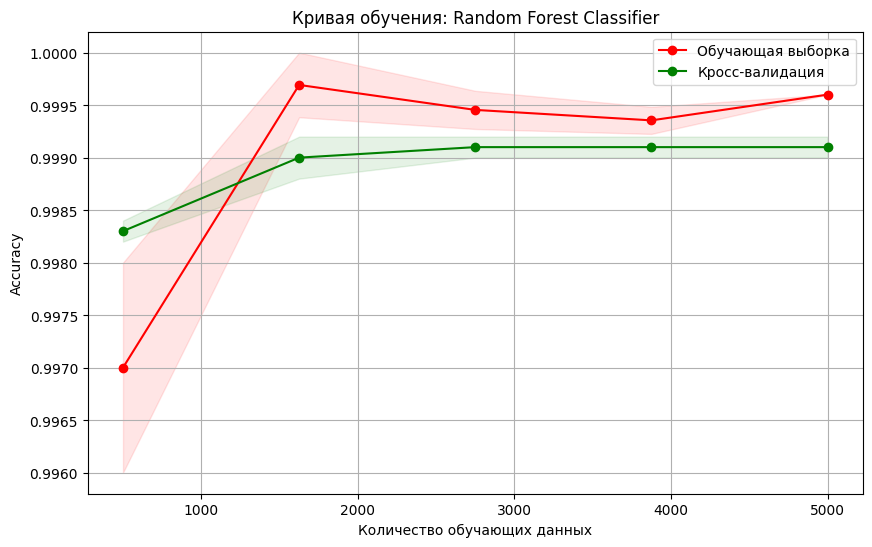

In [ ]:
# График для Random Forest Classifier
print("Построение графика для Random Forest Classifier...")
plot_learning_curve(models["Random Forest Classifier"], X_train_sample, y_train_sample, title="Кривая обучения: Random Forest Classifier")


Кривая обучения для Random Forest Classifier показывает, что модель достигает почти идеальной точности на обучающей выборке (Accuracy ≈ 1.0), что говорит о некотором переобучении. На валидационной выборке точность ниже, но стабилизируется при увеличении количества данных, указывая на хорошую обобщающую способность. Разрыв между кривыми уменьшается по мере роста данных, что демонстрирует, что модель становится менее склонной к переобучению.

Построение кривой обучения для Gradient Boosting...


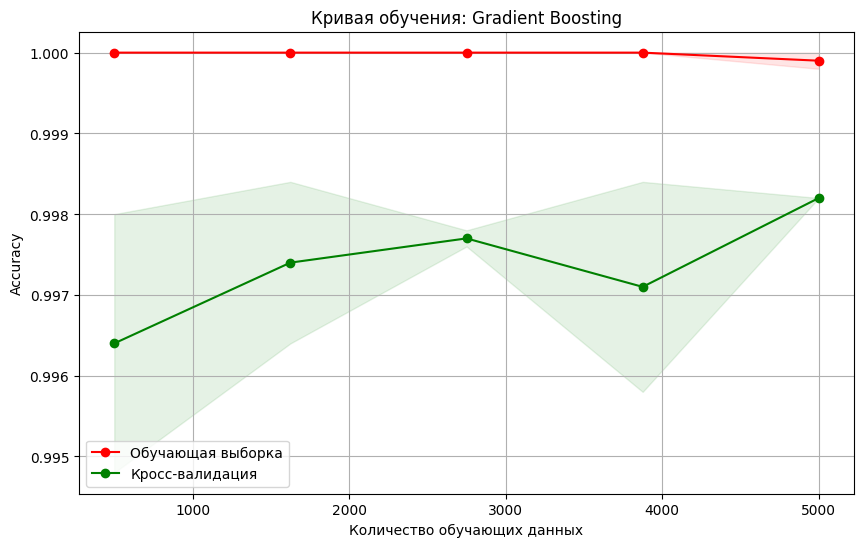

In [ ]:
# Построение кривой обучения для Gradient Boosting
print("Построение кривой обучения для Gradient Boosting...")
plot_learning_curve(gb, X_train_sample, y_train_sample, title="Кривая обучения: Gradient Boosting")

Кривая обучения для Gradient Boosting показывает, что модель достигает почти идеальной точности на обучающей выборке (Accuracy ≈ 1.0), что свидетельствует о переобучении. На валидационной выборке точность ниже, но демонстрирует стабильный рост по мере увеличения объёма данных, хотя с небольшими колебаниями. Разрыв между обучающей и валидационной выборками сохраняется, что указывает на необходимость оптимизации модели

Построение кривой обучения для Support Vector Classifier...


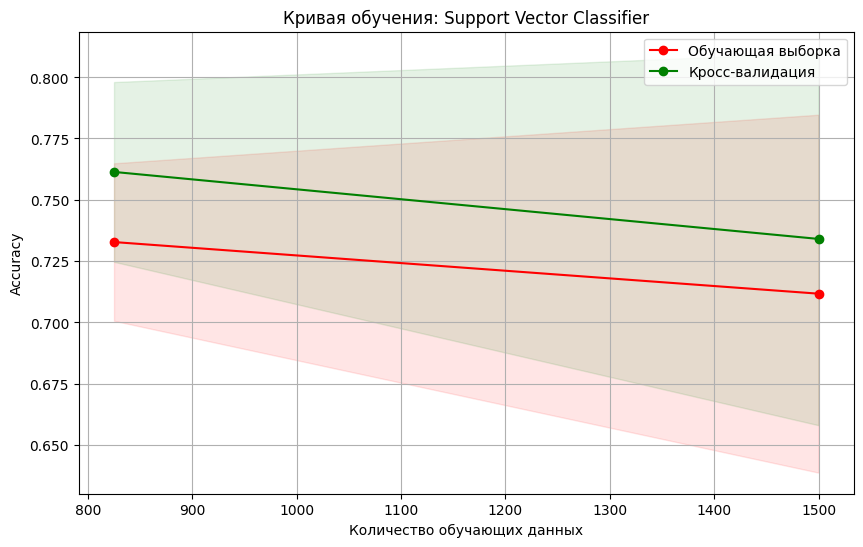

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Создаём модель SVC с оптимизированными параметрами
svc = SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=42)

# Подвыборка данных для ускорения
sample_size = 3000
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, stratify=y_train, random_state=42)

# Функция для построения кривой обучения
def plot_learning_curve(estimator, X, y, title, cv=2, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 3)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Количество обучающих данных")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Построение графика
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Обучающая выборка")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Кросс-валидация")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Построение кривой обучения для SVC
print("Построение кривой обучения для Support Vector Classifier...")
plot_learning_curve(svc, X_train_sample, y_train_sample, title="Кривая обучения: Support Vector Classifier")


Кривая обучения для Support Vector Classifier показывает, что точность на обучающей выборке постепенно снижается с увеличением объёма данных, что указывает на уменьшение переобучения. На валидационной выборке также наблюдается небольшое снижение точности, но результат остаётся стабильным и сопоставимым с обучающей выборкой. Небольшой разрыв между кривыми указывает на хорошую обобщающую способность модели, хотя сама точность остаётся на умеренном уровне (около 0.75).

Общий итог:
Gradient Boosting Classifier и Random Forest Classifier показали наилучшие результаты, демонстрируя стабильность и высокую точность на обучающей и валидационной выборках, с минимальным разрывом между кривыми. Gradient Boosting особенно хорошо справляется с несбалансированными данными, а Random Forest обладает отличной обобщающей способностью. KNeighbors Classifier также показал стабильность, но может быть менее эффективен на больших данных. Logistic Regression и SVC уступают из-за недообучения, а Decision Tree страдает от переобучения. Рекомендуется использовать Gradient Boosting в качестве основной модели, а Random Forest — как дополнительную для сравнения.

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample

# Уменьшение объема данных
X_train_small, y_train_small = resample(X_train, y_train, n_samples=5000, random_state=42)

# Logistic Regression
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=2, method="decision_function")

# KNeighborsClassifier (уменьшенные данные и n_jobs=-1)
knears_pred = cross_val_predict(knears_neighbors, X_train_small, y_train_small, cv=2, method="predict_proba", n_jobs=-1)[:, 1]

# Support Vector Classifier
svc_pred = cross_val_predict(svc, X_train, y_train, cv=2, method="decision_function")

# Decision Tree Classifier
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=2, method="predict_proba")[:, 1]

# RandomForestClassifier (уменьшенные данные и n_jobs=-1)
rf_pred = cross_val_predict(random_forest, X_train_small, y_train_small, cv=2, method="predict_proba", n_jobs=-1)[:, 1]

# GradientBoostingClassifier (уменьшенные данные и n_jobs=-1)
gb_pred = cross_val_predict(grid_gb, X_train_small, y_train_small, cv=2, method="predict_proba", n_jobs=-1)[:, 1]


In [25]:
# Уменьшение данных и меток одновременно
X_train_small, y_train_small = resample(X_train, y_train, n_samples=5000, random_state=42)


In [27]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

# KNeighbors Classifier (уменьшенные данные)
print('KNeighbors Classifier: ', roc_auc_score(y_train_small, knears_pred))

# Support Vector Classifier
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))

# Decision Tree Classifier
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

# Random Forest Classifier (уменьшенные данные)
print('Random Forest Classifier: ', roc_auc_score(y_train_small, rf_pred))

# Gradient Boosting Classifier (уменьшенные данные)
print('Gradient Boosting Classifier: ', roc_auc_score(y_train_small, gb_pred))


Logistic Regression:  0.9341635852309531
KNeighbors Classifier:  0.4976953907815631
Support Vector Classifier:  0.7034183766963853
Decision Tree Classifier:  0.923331464687424
Random Forest Classifier:  0.9481563126252504
Gradient Boosting Classifier:  0.9708617234468938


Построим roc-кривую и посчитаем площадь под ней.

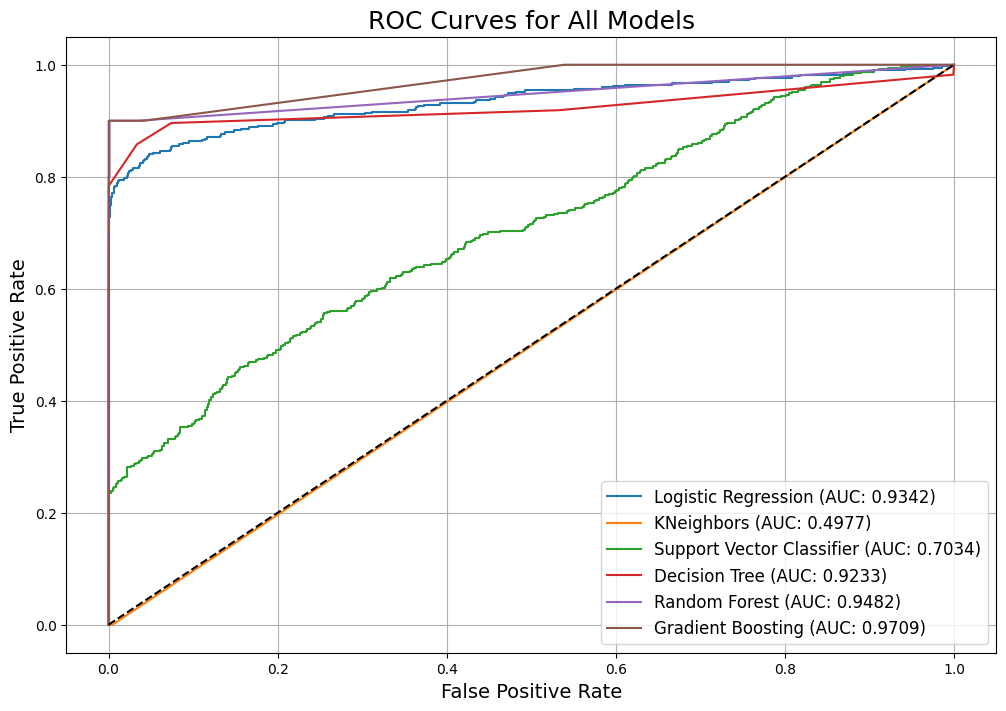

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Вычисление ROC-кривых для всех моделей
log_fpr, log_tpr, _ = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, _ = roc_curve(y_train_small, knears_pred)  # Уменьшенные метки
svc_fpr, svc_tpr, _ = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, _ = roc_curve(y_train, tree_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_train_small, rf_pred)  # Уменьшенные метки
gb_fpr, gb_tpr, _ = roc_curve(y_train_small, gb_pred)  # Уменьшенные метки

# Функция для построения ROC-кривой
def plot_roc_curves():
    plt.figure(figsize=(12, 8))
    plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC: {roc_auc_score(y_train, log_reg_pred):.4f})")
    plt.plot(knear_fpr, knear_tpr, label=f"KNeighbors (AUC: {roc_auc_score(y_train_small, knears_pred):.4f})")  # Уменьшенные метки
    plt.plot(svc_fpr, svc_tpr, label=f"Support Vector Classifier (AUC: {roc_auc_score(y_train, svc_pred):.4f})")
    plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree (AUC: {roc_auc_score(y_train, tree_pred):.4f})")
    plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC: {roc_auc_score(y_train_small, rf_pred):.4f})")  # Уменьшенные метки
    plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC: {roc_auc_score(y_train_small, gb_pred):.4f})")  # Уменьшенные метки
    plt.plot([0, 1], [0, 1], 'k--')  # Диагональ для ориентира
    plt.title('ROC Curves for All Models', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

# Построение ROC-кривой
plot_roc_curves()


На графике представлены ROC-кривые для разных моделей, отражающие их способность различать классы. Gradient Boosting (AUC: 0.9709) и Random Forest (AUC: 0.9482) показали лучшие результаты, демонстрируя высокую точность классификации. Logistic Regression (AUC: 0.9342) и Decision Tree (AUC: 0.9233) также справились с задачей хорошо. Support Vector Classifier (AUC: 0.7034) показал умеренные результаты, а KNeighbors (AUC: 0.4977) оказался на уровне случайного угадывания, что делает его непригодным для этой задачи. Gradient Boosting рекомендован как лучший выбор, но другие успешные модели также могут быть рассмотрены.